# Author's Notes

May 2021 Update #1: This is the supplemental code for Dimensionality Reduction on the Fashion MNIST dataset. There is a separate notebook for the original code for Dimensionality Reduction on the original MNIST dataset for Chapter 3 in the Hands-on Unsupervised Learning book.

May 2021 Update #2: We now generate tab-delimited files (TSVs) for each dimensionality reduction algo. You can load the dimensions along with the labels in [Tensorboard Projector](https://projector.tensorflow.org) to visualize dimensionality reduction in 3-D space.

Note for Mac users: You will need to use the "tensorflow_mac" Conda environment for this notebook instead of the "unsupervisedLearning" Conda environment. Please refer to the README on the GitHub repo for more.

From [Hands-on Unsupervised Learning using Python](https://amzn.to/2tVABNx) - Chapter 3 - Dimensionality Reduction

# Google Colab Setup
**Only for users on Google Colab**

In [ ]:
# Define functions to connect to Google and change directories
def connectDrive():
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

def changeDirectory(path):
    import os
    original_path = os.getcwd()
    os.chdir(path)
    new_path = os.getcwd()
    print("Original path: ",original_path)
    print("New path: ",new_path)

# Connect to Google Drive
connectDrive()

# Change path
changeDirectory("/content/drive/My Drive/github/handson-unsupervised-learning/")

Mounted at /content/drive
Original path:  /content
New path:  /content/drive/My Drive/github/handson-unsupervised-learning


# Import Libraries

In [ ]:
# Import libraries
'''Main'''
import numpy as np
import pandas as pd
import os, time, pickle, gzip
import datetime

'''Data Prep'''
from sklearn import preprocessing as pp 

'''Data Viz'''
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

'''TensorFlow'''
import tensorflow as tf

# Load & Explore Data

In [ ]:
# Fashion MNIST Dataset
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data

In [ ]:
# Load the fashion-mnist pre-shuffled train data and test data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

X_train = np.reshape(X_train, (60000,784))
X_test = np.reshape(X_test, (10000, 784))

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Verify shape of datasets
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (60000, 784)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 784)
Shape of y_test:  (10000,)


In [ ]:
# Create Pandas DataFrames from the datasets
train_index = range(0,len(X_train))
test_index = range(len(X_train), len(X_train)+len(X_test))

X_train = pd.DataFrame(data=X_train,index=train_index)
y_train = pd.Series(data=y_train,index=train_index)

X_test = pd.DataFrame(data=X_test,index=test_index)
y_test = pd.Series(data=y_test,index=test_index)

In [ ]:
# Describe the training matrix
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.000800,0.005783,0.030083,0.103800,0.249683,0.414717,0.821667,2.224733,5.698667,14.434650,32.955950,45.918567,52.092600,50.870583,50.522867,53.906417,51.527283,40.653267,26.119367,10.408617,4.108633,1.979683,1.181317,0.850300,0.476850,0.260267,0.097650,0.016817,0.007117,0.02405,0.100883,0.363933,0.769933,2.083733,7.357033,17.536100,32.045450,52.928950,79.701383,100.156617,...,92.48830,90.567067,79.164933,62.327633,45.674217,44.075867,47.825783,38.719717,22.211017,9.115983,3.783350,0.608517,0.023333,0.212667,0.992350,4.344100,12.543200,20.757367,21.015350,17.088583,22.032100,30.453150,41.734083,51.553383,52.618483,46.485483,42.65565,45.210783,50.112867,46.472133,34.564367,23.208633,16.576250,17.831967,22.918850,17.916900,8.485717,2.706333,0.819000,0.070883
std,0.092554,0.249033,0.767868,2.512017,4.331376,5.827394,8.309935,14.201820,23.835980,38.204702,57.762681,66.161902,68.645664,67.931463,67.453509,69.541488,68.016799,62.842361,51.783496,32.534108,20.204783,14.118429,10.757762,9.219995,6.984142,5.152126,2.934722,1.234501,0.566072,1.34649,3.052534,6.509731,9.859173,15.895613,30.176848,48.183136,65.666497,82.238557,95.560216,99.876845,...,100.99172,99.871594,95.203976,88.808717,78.482958,77.142687,83.272019,74.394204,55.783735,37.582833,24.379595,8.002957,0.927435,4.409145,9.772142,20.773456,36.841967,48.747368,48.153419,42.146358,48.217261,54.918196,62.098154,68.512146,69.794871,67.476436,66.31180,66.729707,68.672404,66.100640,57.557779,48.881430,42.044318,43.911297,51.928401,45.173634,29.448614,17.258682,9.133252,2.075829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000

In [ ]:
# Show the labels
y_train.head()

0    9
1    0
2    0
3    3
4    0
dtype: uint8

In [ ]:
# Add in plain English labels
labels_dict = {
    0: "tshirt",
    1: "pants",
    2: "sweater",
    3: "dress",
    4: "coat",
    5: "sandal",
    6: "dressshirt",
    7: "sneaker",
    8: "bag",
    9: "ankleboot",
}
    
y_train_labels = y_train.map(labels_dict)

In [ ]:
# Count numbers of examples by image type
y_train_labels.value_counts()

sneaker       6000
bag           6000
pants         6000
sweater       6000
ankleboot     6000
coat          6000
sandal        6000
tshirt        6000
dress         6000
dressshirt    6000
dtype: int64

In [ ]:
# Define function to view image
def view_image(data, labels, english_labels, example, type = None):
    if type != None:
      slice = english_labels[english_labels==type].index
      data = data.loc[slice]
    for i in range(example):
      label = labels.loc[slice].iloc[i]
      english_label = english_labels.loc[slice].iloc[i]
      image = data.iloc[i,:].values.reshape([28,28])
      plt.title('Example: %d Label: %d English Label: %s' % (i, label, english_label))
      plt.imshow(image, cmap=plt.get_cmap('gray'))
      plt.show()

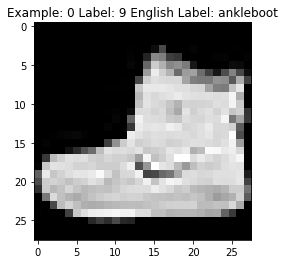

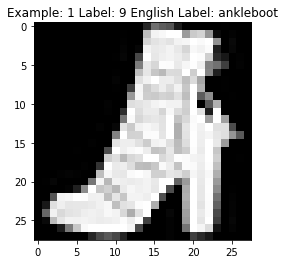

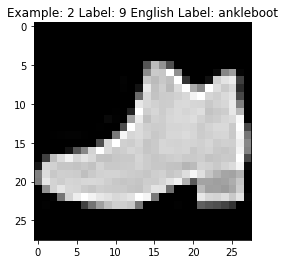

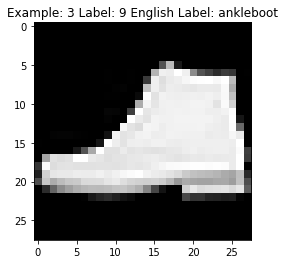

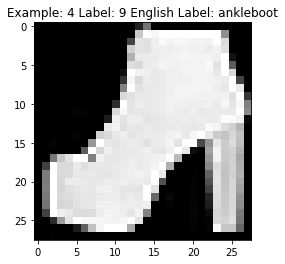

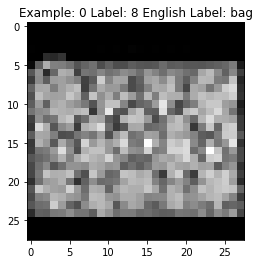

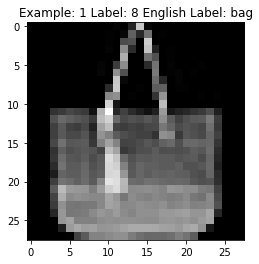

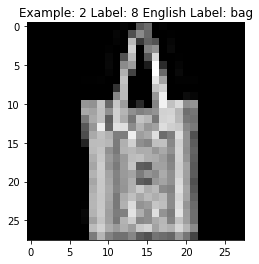

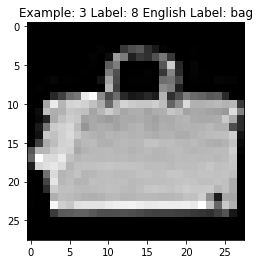

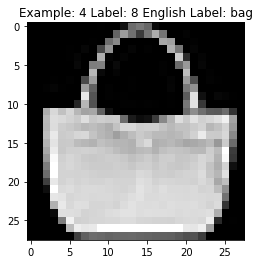

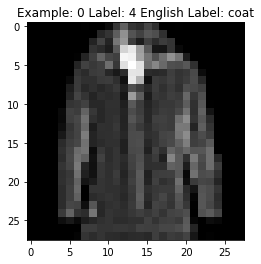

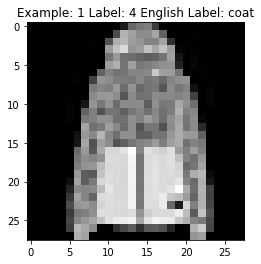

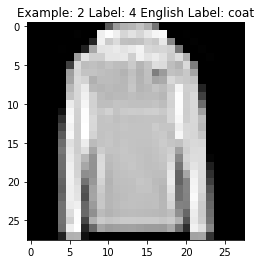

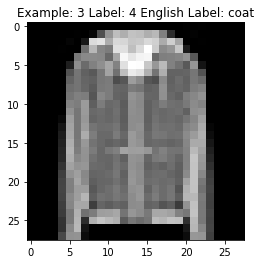

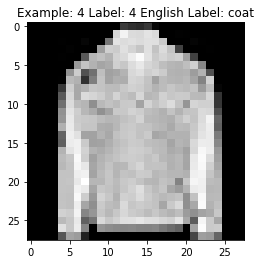

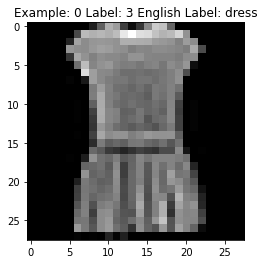

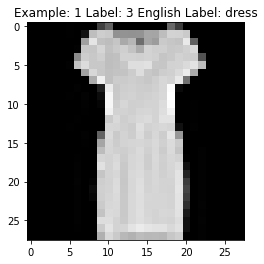

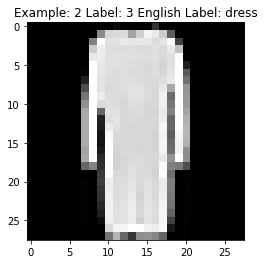

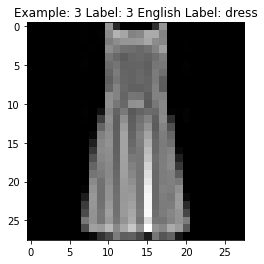

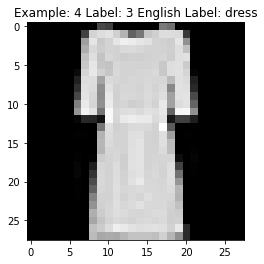

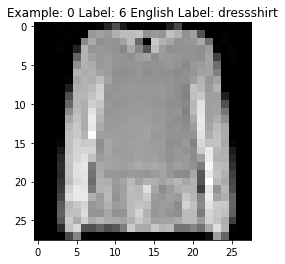

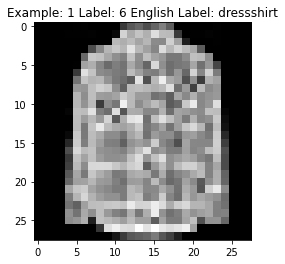

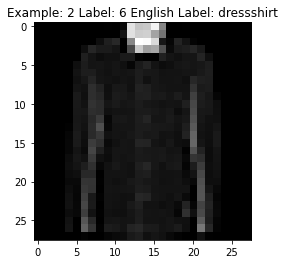

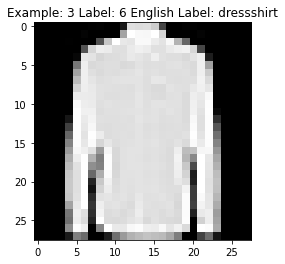

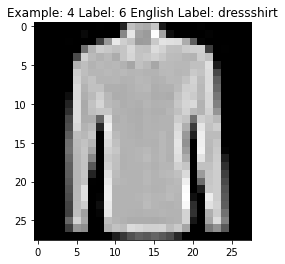

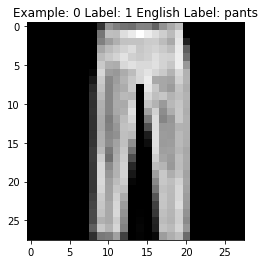

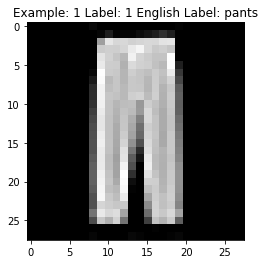

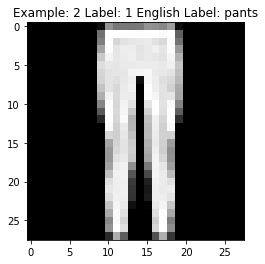

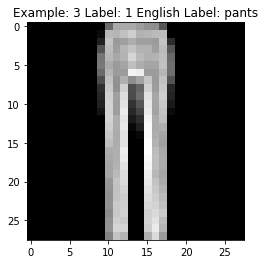

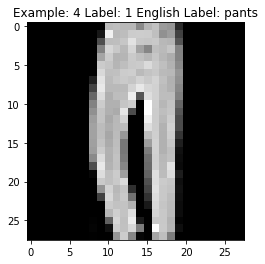

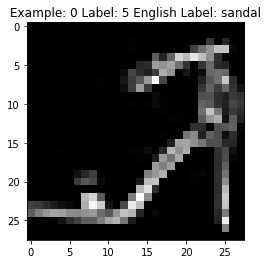

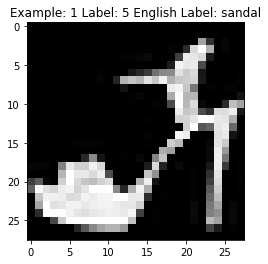

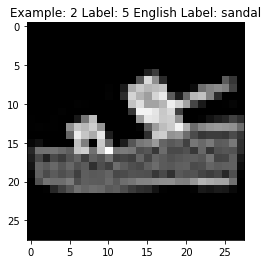

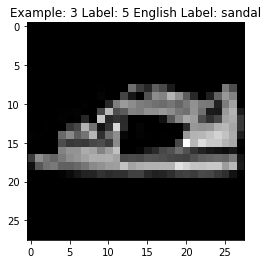

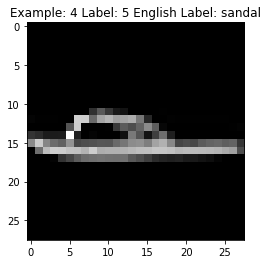

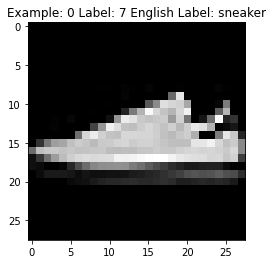

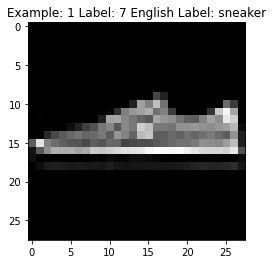

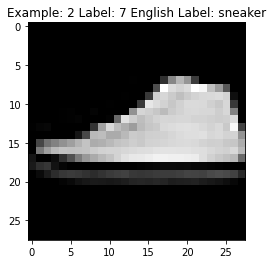

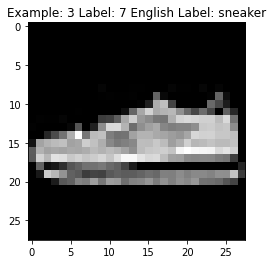

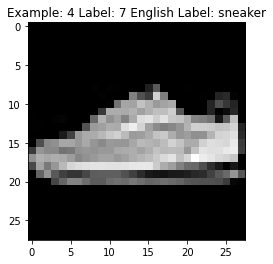

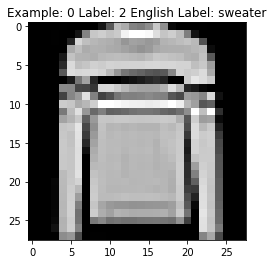

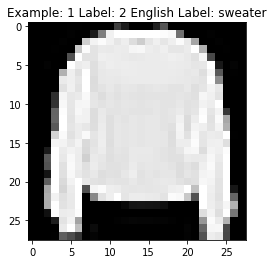

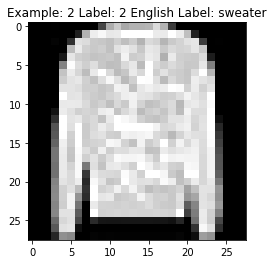

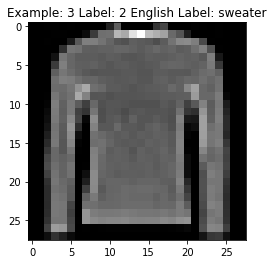

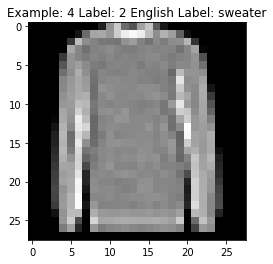

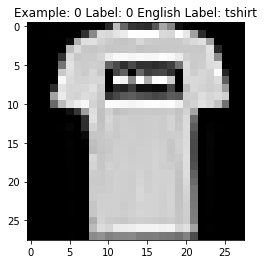

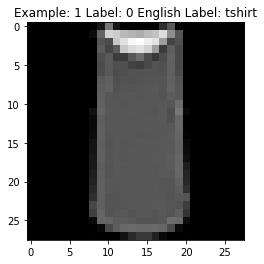

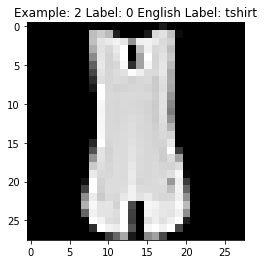

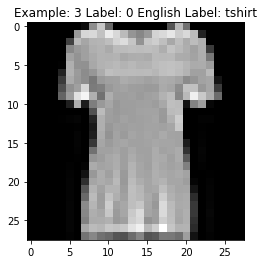

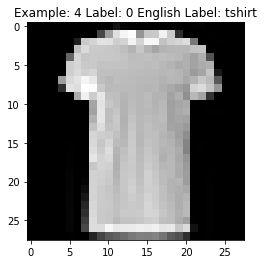

In [ ]:
# View 5 examples of each type of image
for i in np.unique(y_train_labels.values):
  view_image(X_train, y_train, y_train_labels, 5, i)

# Linear Dimensionality Reduction

## PCA

In [ ]:
# Principal Component Analysis
from sklearn.decomposition import PCA

n_components = 784
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=train_index)

In [ ]:
# Percentage of Variance Captured by 784 principal components
print("Variance Explained by all 784 principal components: ", \
      sum(pca.explained_variance_ratio_))

Variance Explained by all 784 principal components:  1.0000000000000007


In [ ]:
# Percentage of Variance Captured by X principal components
importanceOfPrincipalComponents = \
    pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

print('Variance Captured by First 10 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:9].sum(axis=1).values)
print('Variance Captured by First 20 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:19].sum(axis=1).values)
print('Variance Captured by First 50 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:49].sum(axis=1).values)
print('Variance Captured by First 100 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:99].sum(axis=1).values)
print('Variance Captured by First 200 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:199].sum(axis=1).values)
print('Variance Captured by First 300 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:299].sum(axis=1).values)

Variance Captured by First 10 Principal Components:  [0.71990827]
Variance Captured by First 20 Principal Components:  [0.78510155]
Variance Captured by First 50 Principal Components:  [0.8626917]
Variance Captured by First 100 Principal Components:  [0.91234876]
Variance Captured by First 200 Principal Components:  [0.95365469]
Variance Captured by First 300 Principal Components:  [0.97364566]


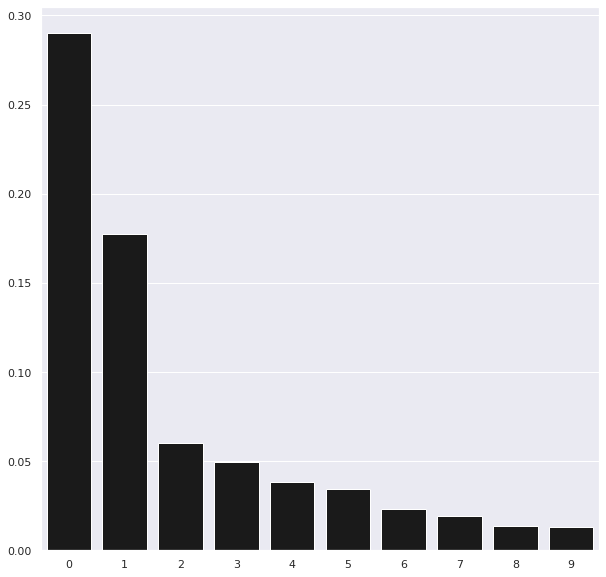

In [ ]:
# View percentage captured by first X components
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(data=importanceOfPrincipalComponents.loc[:,0:9],color='k')

In [ ]:
# Define scatterplot function 
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

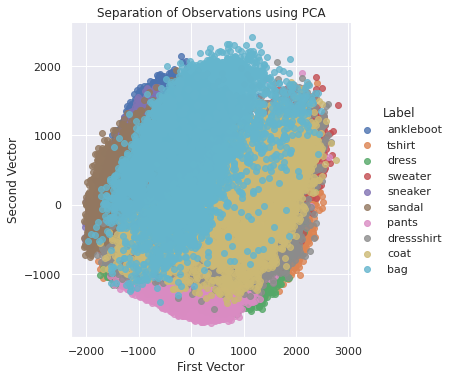

In [ ]:
# View scatterplot
scatterPlot(X_train_PCA, y_train_labels, "PCA")

Text(0.5, 1.0, 'Separation of Observations Using Original Feature Set')

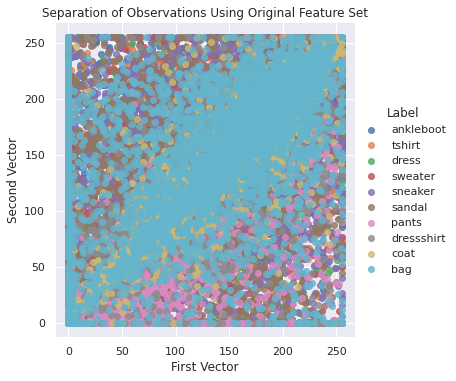

In [ ]:
# View two random dimensions
X_train_scatter = pd.DataFrame(data=X_train.loc[:,[350,406]], index=X_train.index)
X_train_scatter = pd.concat((X_train_scatter,y_train_labels), axis=1, join="inner")
X_train_scatter.columns = ["First Vector", "Second Vector", "Label"]
sns.lmplot(x="First Vector", y="Second Vector", hue="Label", data=X_train_scatter, fit_reg=False)
ax = plt.gca()
ax.set_title("Separation of Observations Using Original Feature Set")

In [ ]:
 # Log data
cwd = os.getcwd()
log_dir = cwd+"/logs/03_dimensionality_reduction_tensorboard_fashion_mnist/"
y_train_labels[0:2000].to_csv(log_dir+'labels.tsv', sep = '\t', index=False, header=False)

In [ ]:
# Write dimensions to CSV
X_train_PCA.iloc[0:2000,0:3].to_csv(log_dir+'pca_data.tsv', sep = '\t', index=False, header=False)

## Incremental PCA

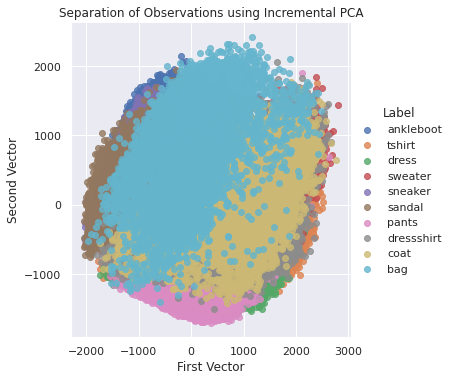

In [ ]:
# Incremental PCA
from sklearn.decomposition import IncrementalPCA

n_components = 784
batch_size = None

incrementalPCA = IncrementalPCA(n_components=n_components, \
                                batch_size=batch_size)

X_train_incrementalPCA = incrementalPCA.fit_transform(X_train)
X_train_incrementalPCA = \
    pd.DataFrame(data=X_train_incrementalPCA, index=train_index)

scatterPlot(X_train_incrementalPCA, y_train_labels, "Incremental PCA")

# Write dimensions to CSV
X_train_incrementalPCA.iloc[0:2000,0:3].to_csv(log_dir+'incremental_pca_data.tsv', sep = '\t', index=False, header=False)

## Sparse PCA

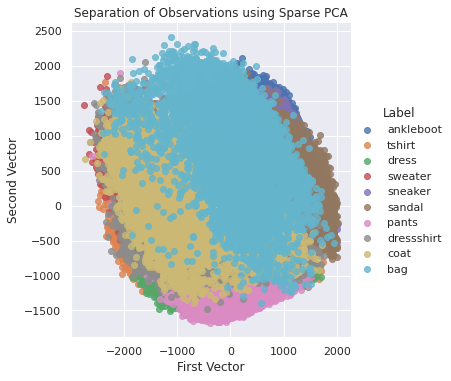

In [ ]:
# Sparse PCA
from sklearn.decomposition import SparsePCA

n_components = 100
alpha = 0.0001
random_state = 2018
n_jobs = -1

sparsePCA = SparsePCA(n_components=n_components, \
                alpha=alpha, random_state=random_state, n_jobs=n_jobs)

sparsePCA.fit(X_train.loc[:10000,:])
X_train_sparsePCA = sparsePCA.transform(X_train)
X_train_sparsePCA = pd.DataFrame(data=X_train_sparsePCA, index=train_index)

scatterPlot(X_train_sparsePCA, y_train_labels, "Sparse PCA")

# Write dimensions to CSV
X_train_sparsePCA.iloc[0:2000,0:3].to_csv(log_dir+'sparse_pca_data.tsv', sep = '\t', index=False, header=False)

## Kernel PCA

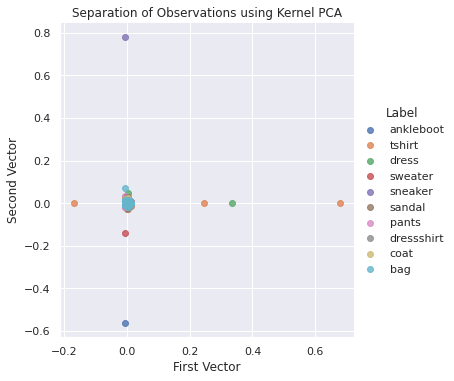

In [ ]:
# Kernel PCA
from sklearn.decomposition import KernelPCA

n_components = 100
kernel = 'rbf'
gamma = None
random_state = 2018
n_jobs = 1

kernelPCA = KernelPCA(n_components=n_components, kernel=kernel, \
                      gamma=gamma, n_jobs=n_jobs, random_state=random_state)

kernelPCA.fit(X_train.loc[:10000,:])
X_train_kernelPCA = kernelPCA.transform(X_train)
X_train_kernelPCA = pd.DataFrame(data=X_train_kernelPCA,index=train_index)

scatterPlot(X_train_kernelPCA, y_train_labels, "Kernel PCA")

# Write dimensions to CSV
X_train_kernelPCA.iloc[0:2000,0:3].to_csv(log_dir+'kernel_pca_data.tsv', sep = '\t', index=False, header=False)

## Singular Value Decomposition

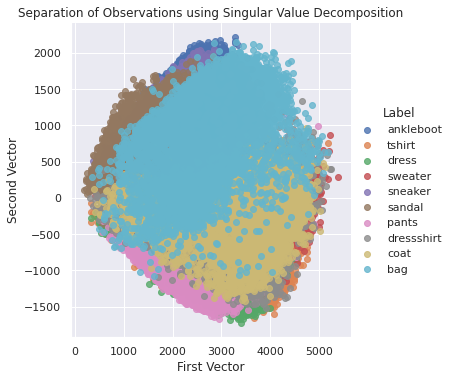

In [ ]:
# Singular Value Decomposition
from sklearn.decomposition import TruncatedSVD

n_components = 200
algorithm = 'randomized'
n_iter = 5
random_state = 2018

svd = TruncatedSVD(n_components=n_components, algorithm=algorithm, \
                   n_iter=n_iter, random_state=random_state)

X_train_svd = svd.fit_transform(X_train)
X_train_svd = pd.DataFrame(data=X_train_svd, index=train_index)

scatterPlot(X_train_svd, y_train_labels, "Singular Value Decomposition")

# Write dimensions to CSV
X_train_svd.iloc[0:2000,0:3].to_csv(log_dir+'svd_data.tsv', sep = '\t', index=False, header=False)

## Gaussian Random Projection

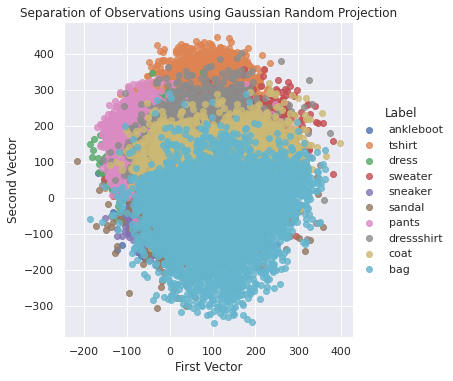

In [ ]:
# Gaussian Random Projection
from sklearn.random_projection import GaussianRandomProjection

n_components = 'auto'
eps = 0.5
random_state = 2018

GRP = GaussianRandomProjection(n_components=n_components, eps=eps, \
                               random_state=random_state)

X_train_GRP = GRP.fit_transform(X_train)
X_train_GRP = pd.DataFrame(data=X_train_GRP, index=train_index)

scatterPlot(X_train_GRP, y_train_labels, "Gaussian Random Projection")

# Write dimensions to CSV
X_train_GRP.iloc[0:2000,0:3].to_csv(log_dir+'gaussian_random_projection_data.tsv', sep = '\t', index=False, header=False)

## Sparse Random Projection

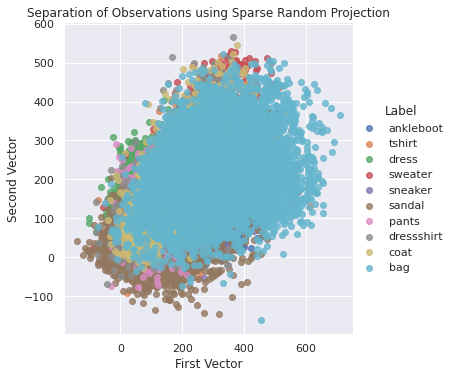

In [ ]:
# Sparse Random Projection
from sklearn.random_projection import SparseRandomProjection

n_components = 'auto'
density = 'auto'
eps = 0.5
dense_output = False
random_state = 2018

SRP = SparseRandomProjection(n_components=n_components, \
        density=density, eps=eps, dense_output=dense_output, \
        random_state=random_state)

X_train_SRP = SRP.fit_transform(X_train)
X_train_SRP = pd.DataFrame(data=X_train_SRP, index=train_index)

scatterPlot(X_train_SRP, y_train_labels, "Sparse Random Projection")

# Write dimensions to CSV
X_train_SRP.iloc[0:2000,0:3].to_csv(log_dir+'sparse_random_projection_data.tsv', sep = '\t', index=False, header=False)

# Non-Linear Dimensionality Reduction

## Isomap

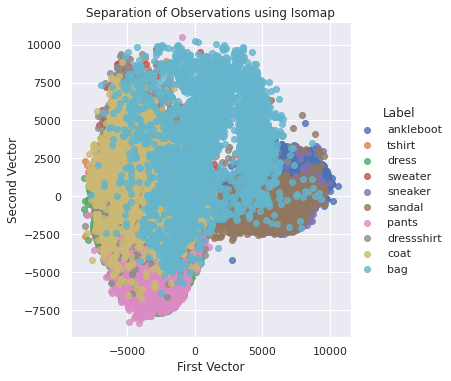

In [ ]:
# Isomap

from sklearn.manifold import Isomap

n_neighbors = 5
n_components = 10
n_jobs = 4

isomap = Isomap(n_neighbors=n_neighbors, \
                n_components=n_components, n_jobs=n_jobs)

isomap.fit(X_train.loc[0:5000,:])
X_train_isomap = isomap.transform(X_train)
X_train_isomap = pd.DataFrame(data=X_train_isomap, index=train_index)

scatterPlot(X_train_isomap, y_train_labels, "Isomap")

# Write dimensions to CSV
X_train_isomap.iloc[0:2000,0:3].to_csv(log_dir+'isomap_data.tsv', sep = '\t', index=False, header=False)

## Multidimensional Scaling

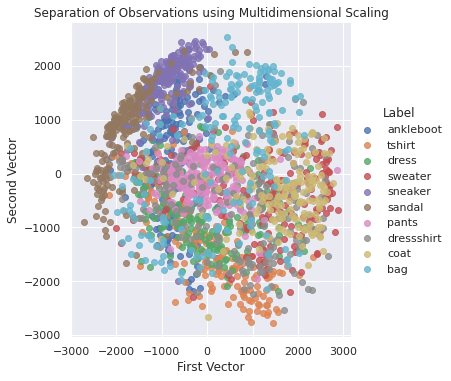

In [ ]:
# Multidimensional Scaling
from sklearn.manifold import MDS

n_components = 3
n_init = 12
max_iter = 1200
metric = True
n_jobs = 4
random_state = 2018

mds = MDS(n_components=n_components, n_init=n_init, max_iter=max_iter, \
          metric=metric, n_jobs=n_jobs, random_state=random_state)

X_train_mds = mds.fit_transform(X_train.loc[0:2000,:])
X_train_mds = pd.DataFrame(data=X_train_mds, index=train_index[0:2001])

scatterPlot(X_train_mds, y_train_labels, "Multidimensional Scaling")

# Write dimensions to CSV
X_train_mds.iloc[0:2000,0:3].to_csv(log_dir+'multidimensional_scaling_data.tsv', sep = '\t', index=False, header=False)

## Locally Linear Embedding

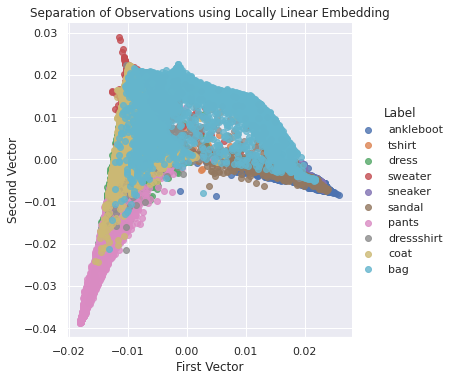

In [ ]:
# Locally Linear Embedding (LLE)
from sklearn.manifold import LocallyLinearEmbedding

n_neighbors = 10
n_components = 3
method = 'modified'
n_jobs = 4
random_state = 2018

lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, \
        n_components=n_components, method=method, \
        random_state=random_state, n_jobs=n_jobs)

lle.fit(X_train.loc[0:5000,:])
X_train_lle = lle.transform(X_train)
X_train_lle = pd.DataFrame(data=X_train_lle, index=train_index)

scatterPlot(X_train_lle, y_train_labels, "Locally Linear Embedding")

# Write dimensions to CSV
X_train_lle.iloc[0:2000,0:3].to_csv(log_dir+'locally_linear_embedding_data.tsv', sep = '\t', index=False, header=False)

## t-SNE

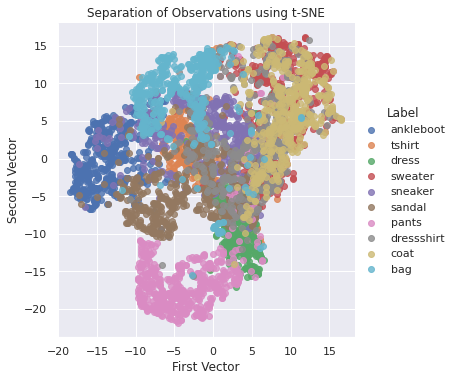

In [ ]:
# t-SNE
from sklearn.manifold import TSNE

n_components = 3
learning_rate = 300
perplexity = 30
early_exaggeration = 12
init = 'random'
random_state = 2018

tSNE = TSNE(n_components=n_components, learning_rate=learning_rate, \
            perplexity=perplexity, early_exaggeration=early_exaggeration, \
            init=init, random_state=random_state)

X_train_tSNE = tSNE.fit_transform(X_train_PCA.loc[:5000,:9])
X_train_tSNE = pd.DataFrame(data=X_train_tSNE, index=train_index[:5001])

scatterPlot(X_train_tSNE, y_train_labels, "t-SNE")

# Write dimensions to CSV
X_train_tSNE.iloc[0:2000,0:3].to_csv(log_dir+'tSNE_data.tsv', sep = '\t', index=False, header=False)

# Other Dimensionality Reduction Algos

## Dictionary Learning

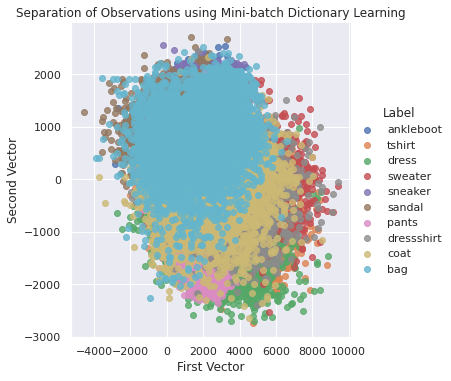

In [ ]:
# Mini-batch dictionary learning
from sklearn.decomposition import MiniBatchDictionaryLearning

n_components = 50
alpha = 1
batch_size = 200
n_iter = 25
random_state = 2018

miniBatchDictLearning = MiniBatchDictionaryLearning( \
                        n_components=n_components, alpha=alpha, \
                        batch_size=batch_size, n_iter=n_iter, \
                        random_state=random_state)

miniBatchDictLearning.fit(X_train.loc[:,:10000])
X_train_miniBatchDictLearning = miniBatchDictLearning.fit_transform(X_train)
X_train_miniBatchDictLearning = pd.DataFrame( \
    data=X_train_miniBatchDictLearning, index=train_index)

scatterPlot(X_train_miniBatchDictLearning, y_train_labels, \
            "Mini-batch Dictionary Learning")

# Write dimensions to CSV
X_train_miniBatchDictLearning.iloc[0:2000,0:3].to_csv(log_dir+'dictionary_learning_data.tsv', sep = '\t', index=False, header=False)

## Independent Component Analysis

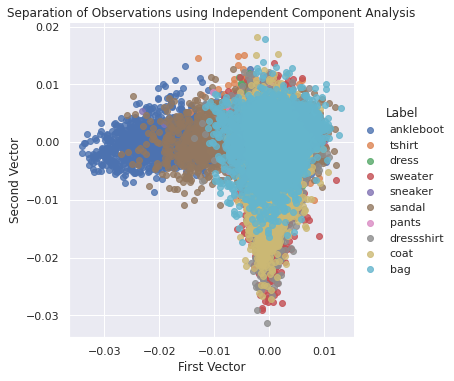

In [ ]:
# Independent Component Analysis
from sklearn.decomposition import FastICA

n_components = 25
algorithm = 'parallel'
whiten = True
max_iter = 100
random_state = 2018

fastICA = FastICA(n_components=n_components, algorithm=algorithm, \
                  whiten=whiten, max_iter=max_iter, random_state=random_state)

X_train_fastICA = fastICA.fit_transform(X_train)
X_train_fastICA = pd.DataFrame(data=X_train_fastICA, index=train_index)

scatterPlot(X_train_fastICA, y_train_labels, "Independent Component Analysis")

# Write dimensions to CSV
X_train_fastICA.iloc[0:2000,0:3].to_csv(log_dir+'independent_component_analysis_data.tsv', sep = '\t', index=False, header=False)

# Conclusion

In [ ]:
import datetime as dt
print("Completed: ", dt.datetime.now())

Completed:  2021-05-05 18:01:48.392958
